In [1]:
# standard libraries import
import os
import glob
import json
import numpy as np

import matplotlib.pyplot as plt
#%matplotlib inline

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib import cm

In [2]:
inputFile = '/home/wabco/Downloads/sdxc/Git repos/Indoor_Location_and_Navigation/Indoor-Location-Navigation-Kaggle/metadata/5a0546857ecc773753327266/B1/geojson_map.json'

In [3]:
# reading as df-like format using geopandas library
import geopandas as gpd

df_places = gpd.read_file(inputFile)
print(f"df_places shape is {df_places.shape}")
df_places.head()

df_places shape is (741, 8)


,max_scale,id,min_scale,planar_graph,version,name,display,geometry
0,0.01,2515733,50000.0,2515733.0,None,None,None,"POLYGON ((13366831.339 3541393.362, 13366832.1..."
1,NaN,5c61274dbc3ca0368d6516aa,NaN,NaN,2019-02-11T07:42:05.998000+00:00,None,None,"POLYGON ((13366831.577 3541284.016, 13366832.2..."
2,NaN,5c61274ebc3ca0368d6516af,NaN,NaN,2019-02-11T07:42:06+00:00,None,None,"POLYGON ((13366831.577 3541284.016, 13366821.9..."
3,NaN,5c61274cbc3ca0368d6513dd,NaN,NaN,2019-02-11T07:42:04.751000+00:00,B276,B276,"POLYGON ((13366564.381 3541170.092, 13366564.1..."
4,NaN,5c61274cbc3ca0368d6513f9,NaN,NaN,2019-02-11T07:42:04.801000+00:00,B258,B258,"POLYGON ((13366639.915 3541173.179, 13366639.6..."


In [4]:
df_places.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   max_scale     1 non-null      float64 
 1   id            741 non-null    object  
 2   min_scale     1 non-null      float64 
 3   planar_graph  1 non-null      float64 
 4   version       740 non-null    object  
 5   name          619 non-null    object  
 6   display       619 non-null    object  
 7   geometry      741 non-null    geometry
dtypes: float64(3), geometry(1), object(4)
memory usage: 46.4+ KB


In [5]:
# Opening JSON file 
f = open(inputFile)

# returns JSON object as  a dictionary 
geoJsonData = json.load(f) 

# geojson keys format
print(geoJsonData.keys())  # dict_keys(['type', 'features'])
print(geoJsonData['type']) # 'FeatureCollection'
print(type(geoJsonData['features'])) #list
print(f"There are {len(geoJsonData['features'])} features in input geoJson file")

dict_keys(['type', 'features'])
FeatureCollection
<class 'list'>
There are 741 features in input geoJson file


In [6]:
print('First feature is ')
geoJsonData['features'][0]

First feature is 


{'geometry': {'type': 'Polygon',
  'coordinates': [[[13366831.3394, 3541393.3621999994],
    [13366832.189199999, 3541398.2589999996],
    [13366803.757, 3541403.1933999993],
    [13366783.944799997, 3541406.6317999996],
    [13366782.1351, 3541396.204399999],
    [13366785.654399998, 3541395.593600001],
    [13366783.8438, 3541385.160700001],
    [13366737.458499998, 3541393.2107999995],
    [13366737.3354, 3541392.501699999],
    [13366709.3063, 3541397.3662],
    [13366646.542999998, 3541401.4486000016],
    [13366590.680799998, 3541400.2646000013],
    [13366586.799099997, 3541377.8977000006],
    [13366585.9419, 3541372.9585999995],
    [13366583.7566, 3541373.3264999986],
    [13366557.844700001, 3541224.020300001],
    [13366554.672799997, 3541223.8905999996],
    [13366549.402400002, 3541223.6752999984],
    [13366546.4159, 3541210.5571000017],
    [13366547.877499998, 3541174.7923999988],
    [13366556.073399998, 3541169.7534000017],
    [13366732.237599999, 3541176.9521000013

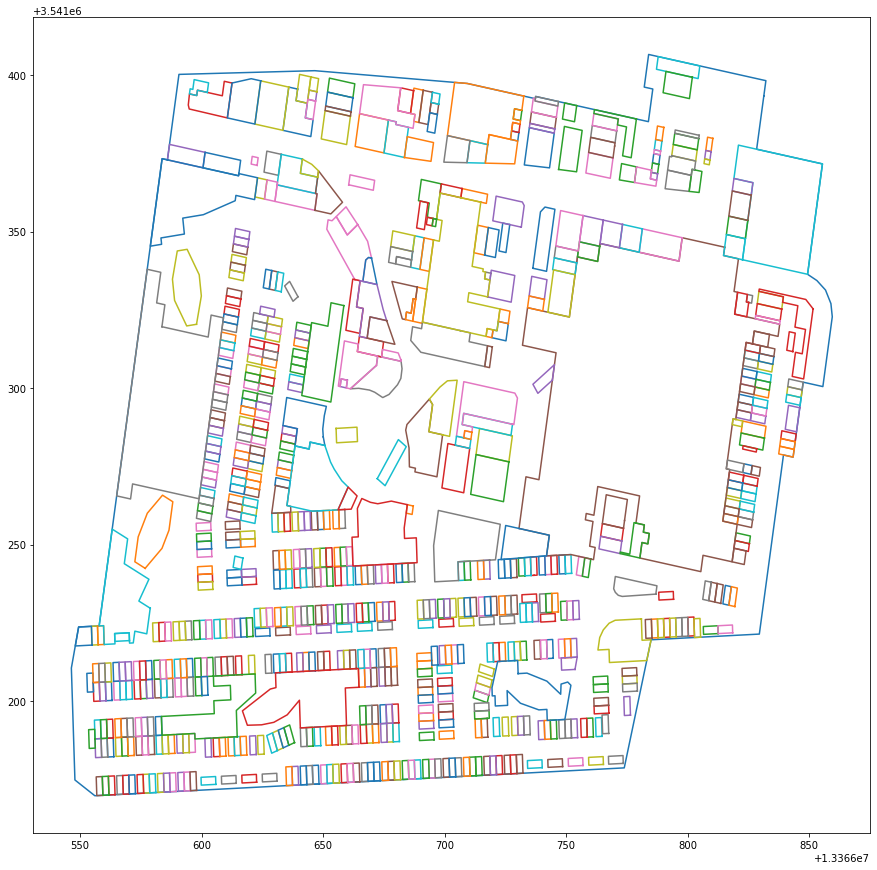

In [14]:
fig, ax = f, axs = plt.subplots(1,1,figsize=(15,15))

patches = []
for idx,feature in enumerate(geoJsonData['features']):
    points = np.squeeze(np.array(feature['geometry']['coordinates']), axis=0)
    ax.plot(points[:,0], points[:,1])
plt.show()